In [1]:
# SVM Classification
# the following examples will use iris dataset to demostrate SVM classification

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC ## there are two methods to work with SVM on Sklearn: 1. LnearSVC 2. SVC Class

In [4]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)] #petal length and petal width
y = (iris["target"]==2).astype(np.float64) # the selected target will be Iris-Virginica


In [5]:
# svm classifer Pipeline
svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("linear_svc", LinearSVC(C=1, loss="hinge")), # If C value is higher then the margin boundary becomes narrow
        ))

svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [6]:
# Verify predictions:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [13]:
# Non LInear SVM Classification
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures # we will use the same approach from the polynomial regression to deal with the nonlinear classification

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [16]:
polynomial_svm_clf = Pipeline((
                        ("poly_features", PolynomialFeatures(degree=3)),
                        ("scaler", StandardScaler()),
                        ("svm_clf", LinearSVC(C=10, loss="hinge"))
                    ))

polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

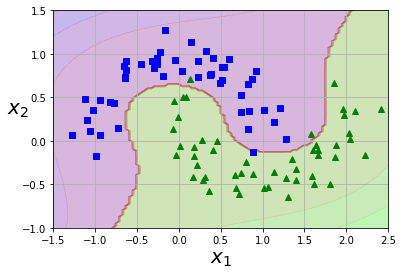

In [17]:
# Show resulting classification boundaries
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


plt.show()

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [18]:
# the previous method could be computational expensive on large datasets, to avoid that we can use the kernel method to deal with this problem
# KERNEL METHOD:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline((
                            ("scaler", StandardScaler()),
                            ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) #coef0 control how much the model is influenced by high-degree polynomials
                        ))

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

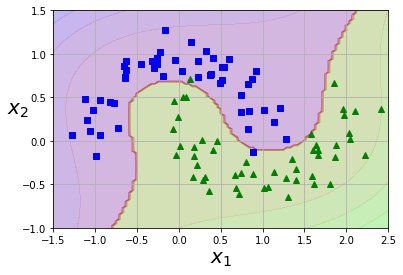

In [19]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [20]:
# APPLYING GAUSSIAN RBF KERNEL
rbf_kernel_svm_clf = Pipeline((
                            ("scaler", StandardScaler()),
                            ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
                    ))

rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

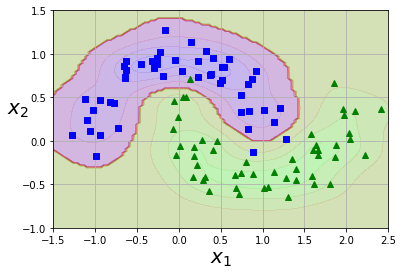

In [21]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])